In [1]:
%matplotlib inline

import skimage
import os
import math
import numpy as np
from skimage import io
from skimage import color
import matplotlib
import matplotlib.pyplot as plt
from skimage import filters
from skimage.transform import pyramid_reduce, pyramid_gaussian
from skimage import img_as_float
from scipy import ndimage as ndi
from skimage.transform import resize

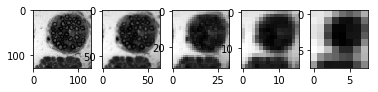

In [2]:
#
# Exercise 2.1
#

def build_pyr(img, levels=1):
    out = {-1: img}
    for l in np.arange(levels):        
        tmp0 = img_as_float(out[l-1])
        tmp1 = ndi.gaussian_filter(tmp0, 4.0/6.0) 
        out_shape = tuple([math.ceil(d /2) for d in tmp1.shape])
        out[l] = resize(tmp1, out_shape, mode='reflect')
    return out    
    
img_gray = io.imread('myelin.png')
pyr0 = build_pyr(img_gray, 5)

plt.figure()
for i in np.arange(5):
    plt_id = int("15%d" % (i+1))
    plt.subplot(plt_id)
    plt.imshow(pyr0[i], cmap='gray')

218
0.821533203125


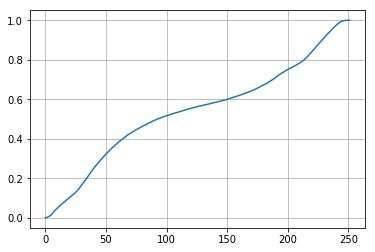

In [18]:
#
# Exercise 2.2
#
from skimage import exposure

def equalize(img):    
    img_cdf, bins = exposure.cumulative_distribution(img)
    return img_cdf, np.interp(img.flat, bins, img_cdf)

img = io.imread('myelin.png')
cdf, out = equalize(img)

plt.plot(cdf)
plt.grid()

print(img[10,10])
xxx = out.reshape(img.shape)
print xxx[10,10]
# plt.figure(1)
# plt.subplot(221)
# plt.imshow(img,cmap='gray')
# plt.subplot(222)
# plt.imshow(out.reshape(img.shape),cmap='gray')
# plt.subplot(223)
# plt.stem(np.histogram(img.reshape(-1),50)[0])
# plt.subplot(224)
# plt.stem(np.histogram(out.reshape(-1),50)[0])

<Container object of 3 artists>

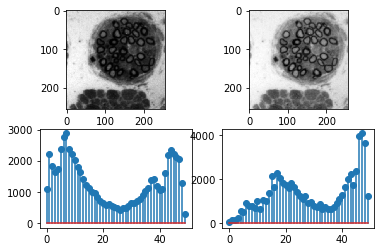

In [109]:
#
# Exercise 2.3
#

def contrast_transfer(img, s=0.5):
    return np.power(img, s)

img = io.imread('myelin.png')
out = contrast_transfer(img, 0.5)

plt.figure(1)
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.subplot(222)
plt.imshow(out, cmap='gray')
plt.subplot(223)
plt.stem(np.histogram(img.reshape(-1),50)[0])
plt.subplot(224)
plt.stem(np.histogram(out.reshape(-1),50)[0])

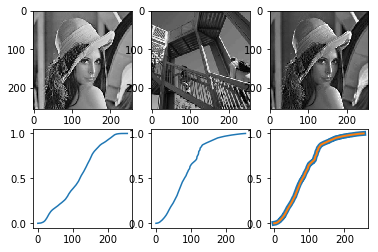

In [203]:
#
# Exercise 2.4
#
def match_histograms(src, tgt):
    
    # get unique src values, where they occur and how many
    src_val, bin_idx, src_counts = np.unique(
        src, 
        return_inverse=True, 
        return_counts=True)
    # get unique tgt values and how many
    tgt_values, tgt_counts = np.unique(
        tgt, 
        return_counts=True)
    
    # get src/tgt CDFs
    src_cdf, _ = exposure.cumulative_distribution(src)
    tgt_cdf, _ = exposure.cumulative_distribution(tgt)
    
    # interpolate CDF values according to target
    out = np.interp(src_cdf, tgt_cdf, tgt_values)
    
    # distribute interpolated values and reshape
    return out[bin_idx].reshape(src.shape)

src = io.imread('lena.jpg')
tgt = io.imread('stairs.jpg')
out = match_histograms(src, tgt)
    
plt.figure(1)
plt.subplot(231)
plt.imshow(src, cmap='gray')
plt.subplot(232)
plt.imshow(tgt, cmap='gray')
plt.subplot(233)
plt.imshow(out, cmap='gray')

src_cdf, _ = exposure.cumulative_distribution(src)
tgt_cdf, _ = exposure.cumulative_distribution(tgt)
out_cdf, _ = exposure.cumulative_distribution(out)

plt.subplot(234)
plt.plot(src_cdf)
plt.subplot(235)
plt.plot(tgt_cdf)
plt.subplot(236)
plt.plot(out_cdf,lw=5)
plt.plot(tgt_cdf,lw=2)

In [205]:
a = np.array([1,2,3])
b = np.array([0,0,0,0,2,2])
print a[b]

[1 1 1 1 3 3]


In [6]:
[math.ceil(d/2) for d in [256,128]]

[128.0, 64.0]